# Introduction to Satellite Imagery and GeoSpatial Data

## The Data

Sentinel 2 is part of the Copernicus programme. It is made up of 2 satelites (2a and 2b) with identical equipment that make observations of the Earth. This research paper does a very good comparison of the two (ref: A COMPARISON OF SENTINEL-2A AND SENTINEL-2B WITH PRELIMINARY RESULTS). On board is sensorary equipment that take readings/photos. One image contains 13 different bands. Different bands have different spatial resolutions that range from 10 to 60 meters. The Satelites have an orbital period of 5 days. 

Bands can be combined in different orders to give insight and highlight information from above. There are four main bands that we will look at and combine initialy. These bands are red, green, blue, and near infrared bands. 
Take note of the order that these are in (bgr not rgb). These files were downloaded from the European Space Agency (ESA). I've edited the file path so that it is nice and short. 

In [2]:
# in order to import these we need to import a library called Rasterio. 
import rasterio
from rasterio import plot

In [3]:
#blue
band2 = rasterio.open('data\IMG_DATA\T29UMU_20191021T115401_B02.jp2')
#green
band3 = rasterio.open('data\IMG_DATA\T29UMU_20191021T115401_B03.jp2')
#red
band4 = rasterio.open('data\IMG_DATA\T29UMU_20191021T115401_B04.jp2')
#near infra red (nir)
band8 = rasterio.open('data\IMG_DATA\T29UMU_20191021T115401_B08.jp2')

Now we've got the 4 bands that we want to look at loaded in, lets explore some of the finer details of these bands.

In [4]:
band2.profile

{'driver': 'JP2OpenJPEG', 'dtype': 'uint16', 'nodata': None, 'width': 10980, 'height': 10980, 'count': 1, 'crs': CRS.from_epsg(32629), 'transform': Affine(10.0, 0.0, 399960.0,
       0.0, -10.0, 5900040.0), 'blockxsize': 1024, 'blockysize': 1024, 'tiled': True}

It can be seen that the band2 image is a square image (dimention 10981 x 10981). The data type is unit16. It's count is 1, a single layer. We will touch on this later, think of it as a single glazed window. A triple glazed window is like an rgb image. The transform parameters when converting the matrix array to a raster are (10.0, 0.0, 399960.0, 0.0, -10.0, 5900040.0). The coordinate reference system (crs) is 32629. 326 is the northern hemisphere, 29 is roughly the "vertical" line that Ireland is on. 327 refers to the southern hemisphere. 

In [5]:
plot.show(band2)

<Figure size 640x480 with 1 Axes>

This is what the blue band looks like when it's plotted. What does the data actually look like? Using the read function it can be seen that the array below is an array of arrays. 

In [6]:
band2.read()

array([[[4779, 4702, 4680, ..., 1381, 1390, 1390],
        [4797, 4737, 4717, ..., 1386, 1386, 1411],
        [4816, 4786, 4703, ..., 1377, 1379, 1382],
        ...,
        [1364, 1366, 1355, ..., 1245, 1278, 1208],
        [1354, 1366, 1366, ..., 1237, 1253, 1221],
        [1354, 1363, 1382, ..., 1184, 1262, 1247]]], dtype=uint16)

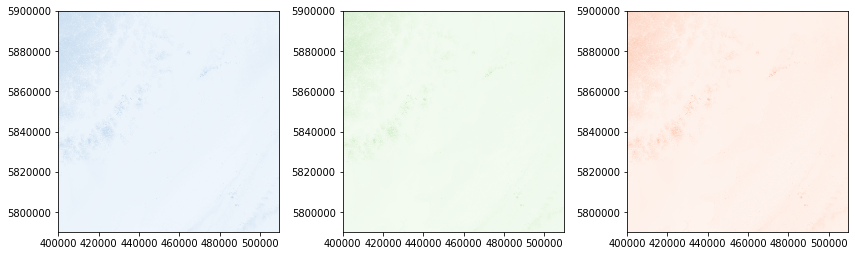

In [7]:
# plotting the 3 different colour bands 
%matplotlib inline
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
plot.show(band2, ax=ax1, cmap='Blues')
plot.show(band3, ax=ax2, cmap='Greens')
plot.show(band4, ax=ax3, cmap='Reds')
fig.tight_layout()

In [11]:
# create a natural colour image
# *create an output directory

natural_colour = rasterio.open('output/natural_colour.tiff',
                               'w',
                               driver='Gtiff',
                               width=band2.width, height=band2.height,
                               count=3,
                               crs=band2.crs,
                               transform=band2.transform,
                               dtype=band2.dtypes[0]
                               )
natural_colour.write(band4.read(1),1) #red
natural_colour.write(band3.read(1),2) #green
natural_colour.write(band2.read(1),3) #blue
natural_colour.close()

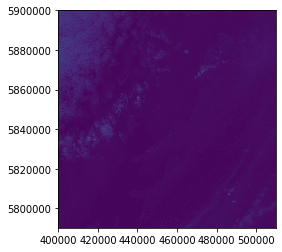

In [12]:
natcol = rasterio.open("output/natural_colour.tiff", count=3)
plot.show(natcol)

In [13]:
# we can also create a false colour image

false_colour = rasterio.open('output/false_colour.tiff', 'w', driver='Gtiff',
                          width=band2.width, height=band2.height,
                          count=3,
                          crs=band2.crs,
                          transform=band2.transform,
                          dtype='uint16'                   
                         )
false_colour.write(band8.read(1),1)  # nir
false_colour.write(band3.read(1),2)  # Green
false_colour.write(band2.read(1),3)  # blue
false_colour.close()

A false-colour composite image with georeferencing is created. The band combination chosen makes vegetation appear in shades of red because vegetation reflects a lot of near infrared light. The brighter the red, the healthier the vegetation. Urban areas appear blue-grey

In [ ]:
# Histogram plot of the break down of colours to be put in here. 